<center><h1> Финальный проект курса </h1></center>



### Подготовка данных

In [2]:
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [ ]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
DATA_PATH = "./data/"
TRAIN_FILE = "fashion-mnist_train.csv"
TEST_FILE = "fashion-mnist_test.csv"

In [ ]:
train_df = pd.read_csv(DATA_PATH + TRAIN_FILE)
test_df = pd.read_csv(DATA_PATH + TEST_FILE)

In [ ]:
train_df.head()

Выделение меток объектов и нормализованной матрицы *объекты-признаки*.



In [ ]:
y_train = keras.utils.to_categorical(train_df['label'])
y_test = keras.utils.to_categorical(test_df['label'])

X_train = train_df.drop("label", axis=1).values / 255.0
X_test = test_df.drop("label", axis=1).values /255.0

### Логистическая регрессия

Можно представить в качесте  нейронной сети с выходом *Softmax*.


In [7]:
log_reg = Sequential()
log_reg.add(Dense(
    y_train.shape[1], 
    activation='softmax', 
    input_shape=(X_train.shape[1],)
))

log_reg.compile(    
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(),
    metrics=['accuracy']
)

log_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Будем использовать *EarlyStopping* с валидационной выборкой для того, чтобы модель не переобучилась.

In [8]:
EPOCHS = 1000

In [9]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = log_reg.fit(X_train, y_train, validation_split=0.2, 
                    epochs=EPOCHS, callbacks=[callback], verbose=0)

Графики обучения модели в зависимости от пройденных эпох:

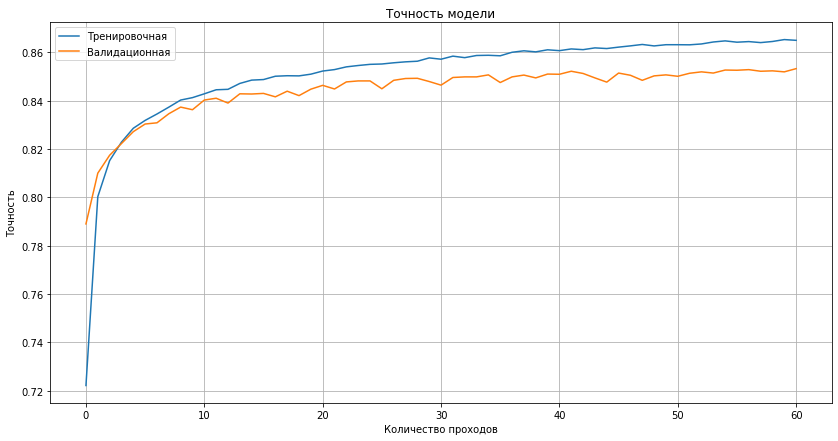

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочная', 'Валидационная'], loc='upper left')
plt.grid()
plt.show()

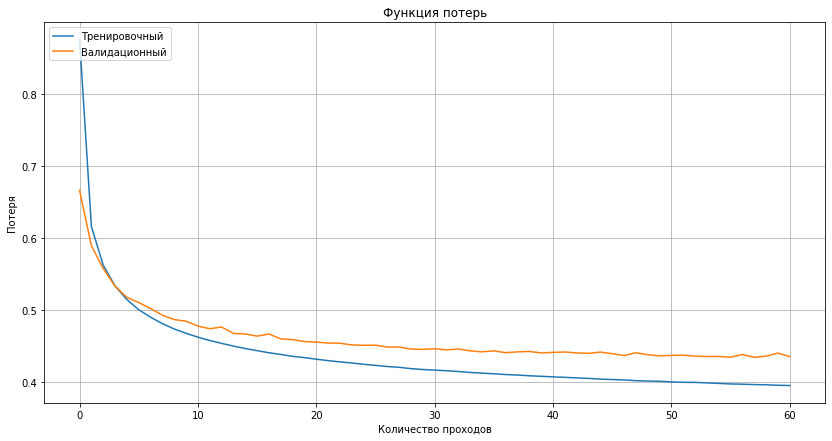

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Функция потерь')
plt.ylabel('Потеря')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочный', 'Валидационный'], loc='upper left')
plt.grid()
plt.show()

Показатели сети на тестовых данных.


In [12]:
print('Тестирование:')
scores = log_reg.evaluate(X_test, y_test, verbose = 0)
print("%s: %.3f%%" % (log_reg.metrics_names[0], scores[0])) # loss (потери)
print("%s: %.2f%%" % (log_reg.metrics_names[1], scores[1]*100)) # acc (точность)

Тестирование:
loss: 0.426%
accuracy: 85.53%


### Полносвязная сеть


Спроектируем сеть с 3 скрытыми слоями.

In [13]:
NEUROS_1 = 128
NEUROS_2 = 256
NEUROS_3 = 256

Стоит отметить как сильно возросло количество настраиваемых весов в сети.


In [14]:
fcn = Sequential()

fcn.add(Dense(
    NEUROS_1, 
    activation='relu', 
    input_shape=(X_train.shape[1],)
))

fcn.add(Dense(
    NEUROS_2, 
    activation='relu'
))

fcn.add(Dense(
    NEUROS_3, 
    activation='relu'
))

fcn.add(Dense(
    y_train.shape[1], 
    activation='softmax', 
    input_shape=(X_train.shape[1],)
))

fcn.compile(    
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(),
    metrics=['accuracy']
)

fcn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [15]:
EPOCHS = 1000

In [16]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = fcn.fit(X_train, y_train, validation_split=0.2, 
                    epochs=EPOCHS, callbacks=[callback], verbose=0)

Иллюстрация обучения сети.

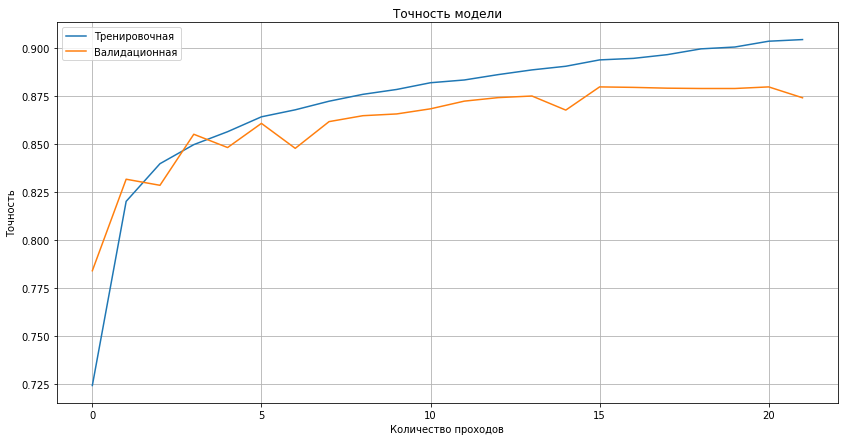

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочная', 'Валидационная'], loc='upper left')
plt.grid()
plt.show()

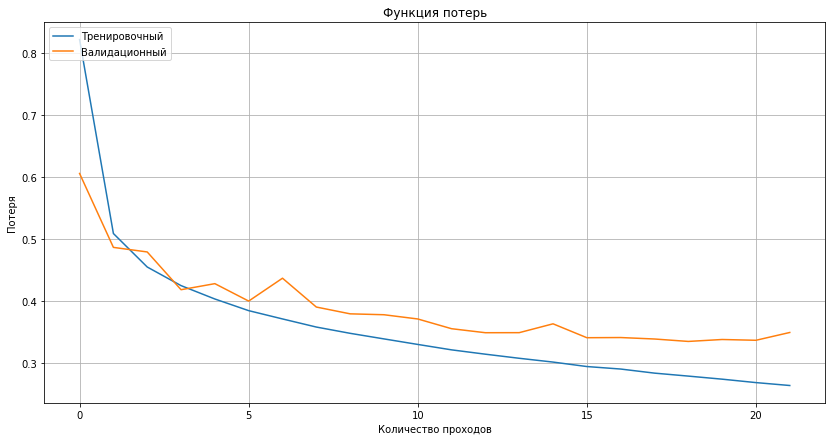

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Функция потерь')
plt.ylabel('Потеря')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочный', 'Валидационный'], loc='upper left')
plt.grid()
plt.show()

Качество предсказания на тестовых данных:

In [19]:
print('Тестирование:')
scores = fcn.evaluate(X_test, y_test, verbose = 0)
print("%s: %.3f" % (fcn.metrics_names[0], scores[0])) # loss (потери)
print("%s: %.2f%%" % (fcn.metrics_names[1], scores[1]*100)) # acc (точность)

Тестирование:
loss: 0.334
accuracy: 87.67%


Мы видим, что качество сети улучшилось, благодаря тому, что сеть с большим количеством параметров гораздо более гибко подстраивается под обучающие данные, нежели классические модели, однако такие сети гораздо труднее обучать, что показало время обучения, а также трудно настроить их параметры.

### Сверточная сеть



Преобразуем данные для сверточной сети.


In [20]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

In [21]:
EPOCHS = 1000

#### Сеть №1


Спроектируем сеть из сверточных слоев, после чего добавим несколко полносвязных для классификачии по полученной карте признаков.

In [22]:
cnn = Sequential()
cnn.add(Input(shape=X_train.shape[1:]))
cnn.add(Convolution2D(32, 5, activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Convolution2D(64, 3, activation="relu"))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dense(y_train.shape[1], activation='softmax'))

cnn.compile(    
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(),
    metrics=['accuracy']
)

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 839,946
Trainable params: 839,946
Non-trainable params: 0
________________________________________________

Обучим сеть и посмотрим на результаты:

In [23]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = cnn.fit(X_train, y_train, validation_split=0.2, 
                    epochs=EPOCHS, callbacks=[callback], verbose=0)

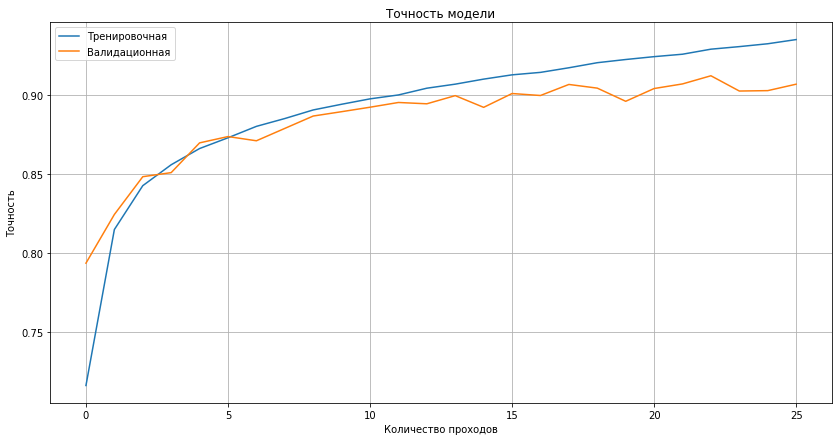

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочная', 'Валидационная'], loc='upper left')
plt.grid()
plt.show()

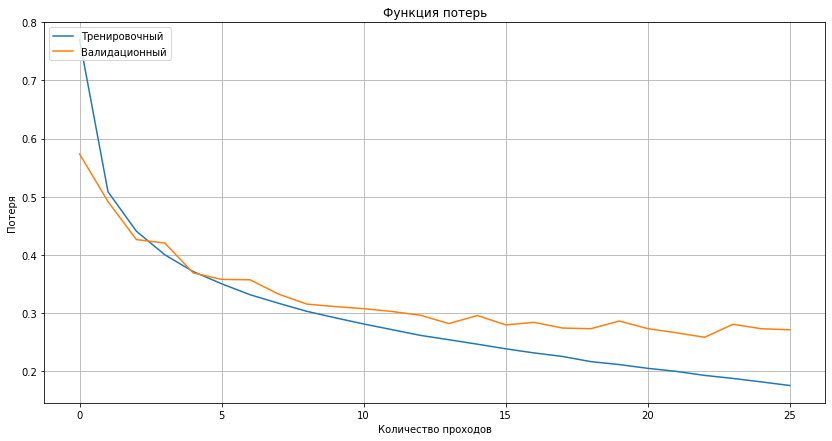

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Функция потерь')
plt.ylabel('Потеря')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочный', 'Валидационный'], loc='upper left')
plt.grid()
plt.show()

In [26]:
print('Тестирование:')
scores = cnn.evaluate(X_test, y_test, verbose = 0)
print("%s: %.3f" % (cnn.metrics_names[0], scores[0])) # loss (потери)
print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100)) # acc (точность)

Тестирование:
loss: 0.256
accuracy: 90.94%


Сверточная сеть заметно лучше лучше работает на изображениях, нежели полносвязная сеть.

#### Сеть №2

Добавим несколько дополнительных слоёв к сети. Отметим как сильно уменьшилось количество настраиваемых параметров сети при сильно возросшей глубине.

In [27]:
cnn2 = Sequential()
cnn2.add(Input(shape=X_train.shape[1:]))
cnn2.add(Convolution2D(32, 3, activation="relu"))

cnn2.add(Convolution2D(32, 1, activation="relu"))

cnn2.add(MaxPooling2D())

cnn2.add(Convolution2D(48, 3, activation="relu"))


cnn2.add(Convolution2D(64, 3, activation="relu"))


cnn2.add(Flatten())

cnn2.add(Dense(128, activation="relu"))
cnn2.add(Dense(y_train.shape[1], activation='softmax'))

cnn2.compile(    
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(),
    metrics=['accuracy']
)

cnn2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          27712     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

Результаты

In [28]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = cnn2.fit(X_train, y_train, validation_split=0.2, 
                    epochs=EPOCHS, callbacks=[callback], verbose=0)

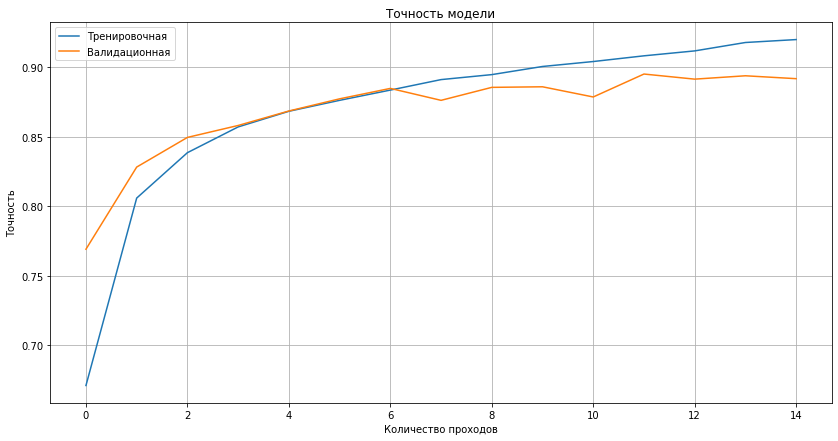

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочная', 'Валидационная'], loc='upper left')
plt.grid()
plt.show()

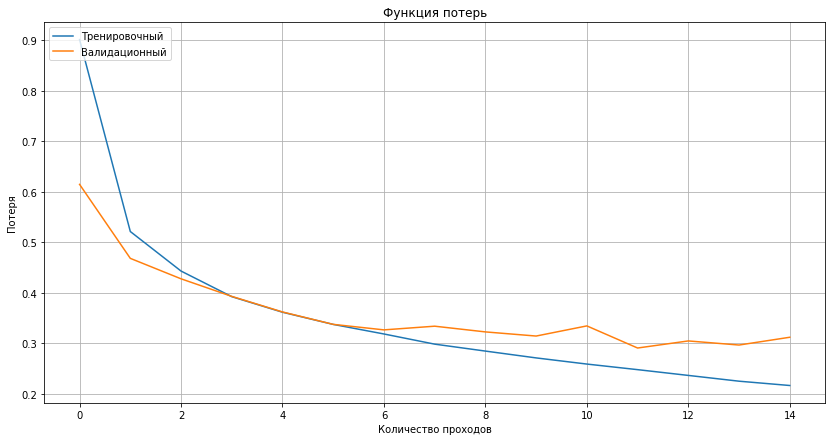

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Функция потерь')
plt.ylabel('Потеря')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочный', 'Валидационный'], loc='upper left')
plt.grid()
plt.show()

In [31]:
print('Тестирование:')
scores = cnn2.evaluate(X_test, y_test, verbose = 0)
print("%s: %.3f" % (cnn2.metrics_names[0], scores[0])) # loss (потери)
print("%s: %.2f%%" % (cnn2.metrics_names[1], scores[1]*100)) # acc (точность)

Тестирование:
loss: 0.290
accuracy: 89.66%


При добавлении новых слоев уменьшилось количество параметров благодаря снижению размерности, однако в силу того, что сильно снизилось количество выходных данных после операций сверток и дискредитации, качество модели ухудшилось. Это показывает, что добавлять новые слои нужно осторожнее, чтобы не потерять информацию в ходе прохода изображения через сеть.

#### Сеть №3

Добавим несколько слоёв *BatchNormalisation*, которые должны ускорить процесс обучения и увеличить способность модели справляться с разнородностью в данных.


In [33]:

cnn3 = Sequential()
cnn3.add(Input(shape=X_train.shape[1:]))
cnn3.add(Convolution2D(32, 3, activation="relu"))
cnn3.add(BatchNormalization())
cnn3.add(Convolution2D(32, 1, activation="relu"))

cnn3.add(MaxPooling2D())

cnn3.add(Convolution2D(48, 3, activation="relu"))
cnn3.add(BatchNormalization())
cnn3.add(Convolution2D(64, 3, activation="relu"))


cnn3.add(Flatten())

cnn3.add(Dense(128, activation="relu"))
cnn3.add(Dense(y_train.shape[1], activation='softmax'))

cnn3.compile(    
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(),
    metrics=['accuracy']
)

cnn3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        1056      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 48)        192       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 64)         

In [34]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = cnn3.fit(X_train, y_train, validation_split=0.2, 
                    epochs=EPOCHS, callbacks=[callback], verbose=0)

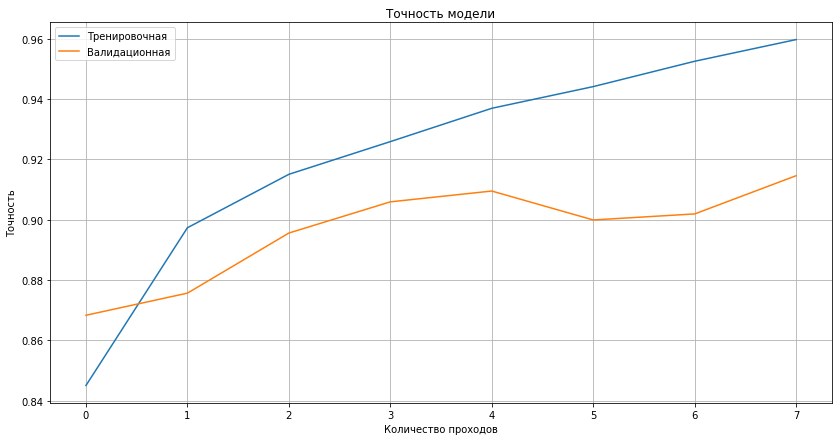

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочная', 'Валидационная'], loc='upper left')
plt.grid()
plt.show()

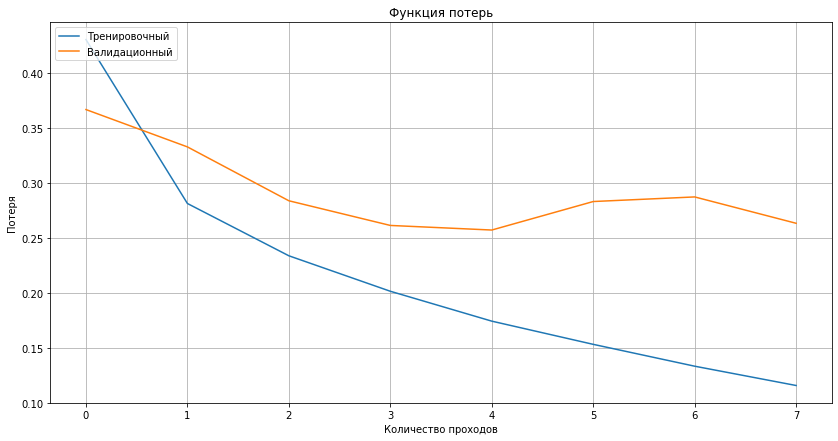

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Функция потерь')
plt.ylabel('Потеря')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочный', 'Валидационный'], loc='upper left')
plt.grid()
plt.show()

In [37]:
print('Тестирование:')
scores = cnn3.evaluate(X_test, y_test, verbose = 0)
print("%s: %.3f" % (cnn3.metrics_names[0], scores[0])) # loss (потери)
print("%s: %.2f%%" % (cnn3.metrics_names[1], scores[1]*100)) # acc (точность)

Тестирование:
loss: 0.251
accuracy: 91.33%


Как видим, при добавлении *BatchNormalisation* слоев заметно ускорилась сходимость нейронной сети, а также выросло качество обучения модели.
